In [4]:
!pip3 install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 35.5 MB/s eta 0:00:00


In [5]:
!pip3 install boxmot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━

In [6]:
!pip3 install gdown

In [10]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
model_path = "/content/gdrive/MyDrive/data/runs/detect/train4/weights/best.pt"
video_path = "/content/gdrive/MyDrive/kapibara_on_the_walk.mp4" # путь к видео с Вашим объектом

Mounted at /content/gdrive/


In [5]:
import os
os.makedirs('/content/gdrive/MyDrive/pr3', exist_ok=True)

In [6]:
from ultralytics import YOLO

detector = YOLO(model_path)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
import cv2

cap = cv2.VideoCapture(video_path)
writer = cv2.VideoWriter('/content/gdrive/MyDrive/pr3/detections_2.mp4', # путь к файлу
                         cv2.VideoWriter_fourcc(*'MPEG'), # кодек
                         25, # FPS
                         (int(cap.get(3)),int(cap.get(4))) # разрешение
                        )
output_file = "/content/gdrive/MyDrive/pr3/detections.mp4"
assert cap.isOpened()

In [8]:
def draw_detections(frame, results, class_names=None):

    frame_with_detections = frame.copy()

    # Пробегаемся по всем детекциям
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Координаты рамки (x1, y1, x2, y2)
        confidence = box.conf[0].item()  # Уверенность
        class_id = int(box.cls[0].item())  # Идентификатор класса

        # Устанавливаем зеленый цвет рамки (BGR: 0, 255, 0) и толщину 3
        color = (0, 255, 0)  # Зеленый цвет
        thickness = 3  # Толщина рамки

        # Отрисовываем рамку
        cv2.rectangle(frame_with_detections, (x1, y1), (x2, y2), color, thickness)

        # Формируем текстовую метку
        label = f"{class_names[class_id] if class_names else class_id}: {confidence:.2f}"

        # Рисуем текст с фоном
        (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(frame_with_detections, (x1, y1 - text_height - baseline), (x1 + text_width, y1), color, -1)
        cv2.putText(frame_with_detections, label, (x1, y1 - baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    return frame_with_detections


In [9]:
while cap.isOpened():
  ret, frame = cap.read()

  if not ret:
    break

  results = detector.predict(frame, verbose=False, classes=[0])
  detections_frame = draw_detections(frame, results[0])

  writer.write(detections_frame)

cap.release()
writer.release()

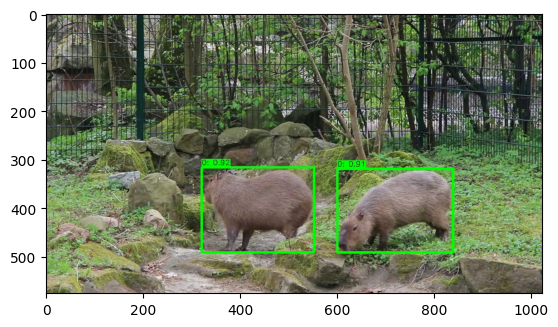

In [10]:
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('/content/gdrive/MyDrive/pr3/detections_2.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 200)

ret, frame = cap.read()

frame_to_show = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_to_show)

In [11]:
from boxmot.trackers.bytetrack.bytetrack import ByteTrack

tracker = ByteTrack()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [12]:
import numpy as np

def convert_yolo_numpy(detections):

    numpy_detections = []

    # Пробегаемся по всем детекциям
    for box in detections.boxes:
        # Извлекаем координаты рамки
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Приводим к numpy
        # Извлекаем уверенность модели
        confidence = box.conf[0].item()
        # Извлекаем идентификатор класса
        class_id = int(box.cls[0].item())

        # Формируем массив для текущей детекции
        numpy_detections.append([x1, y1, x2, y2, confidence, class_id])

    return np.array(numpy_detections)


In [13]:
def draw_tracks_bytetrack(frame, detections, tracks, class_names=None, trajectory_points=None):

    # Если trajectory_points не передан, создаем пустой словарь
    if trajectory_points is None:
        trajectory_points = {}

    tracked_frame = frame.copy()

    # Проходим по всем объектам в треках
    for track in tracks:
        x1, y1, x2, y2, track_id, confidence, class_id = map(int, track[:7])

        # Генерация цвета для каждого трека
        color = ((track_id * 37) % 256, (track_id * 17) % 256, (track_id * 97) % 256)

        # Вычисляем центр объекта
        center_x = (x1 + x2) // 2
        center_y = (y1 + y2) // 2

        # Сохраняем центр в массив траектории
        if track_id not in trajectory_points:
            trajectory_points[track_id] = []
        trajectory_points[track_id].append((center_x, center_y))

        # Рисуем крестик для текущего центра
        cv2.drawMarker(tracked_frame, (center_x, center_y), color, markerType=cv2.MARKER_CROSS, markerSize=10, thickness=2)

        # Рисуем рамку вокруг объекта
        cv2.rectangle(tracked_frame, (x1, y1), (x2, y2), color, 3)

        # Подписываем объект: ID и класс
        label = f"ID {track_id}"
        (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.9, 2)
        cv2.rectangle(tracked_frame, (x1, y1 - text_height - baseline), (x1 + text_width, y1), color, -1)
        cv2.putText(tracked_frame, label, (x1, y1 - baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 0), 2)

    # Рисуем все сохраненные крестики для каждого объекта (полная траектория)
    for track_id, points in trajectory_points.items():
        for point in points:
            # Генерация цвета для каждого объекта
            color = ((track_id * 37) % 256, (track_id * 17) % 256, (track_id * 97) % 256)
            cv2.drawMarker(tracked_frame, point, color, markerType=cv2.MARKER_CROSS, markerSize=10, thickness=2)

    return tracked_frame


In [14]:
cap = cv2.VideoCapture(video_path)
writer = cv2.VideoWriter('/content/gdrive/MyDrive/pr3/tracks.mp4', cv2.VideoWriter_fourcc(*'MPEG'), 25, (int(cap.get(3)),int(cap.get(4))))

assert cap.isOpened()

In [15]:
# Глобальный словарь для отслеживания траекторий объектов
trajectory_points = {}

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Получение детекций YOLO
    results = detector.predict(frame, verbose=False)
    numpy_detections = convert_yolo_numpy(results[0])

    # Обновление трекера ByteTrack
    tracks = tracker.update(numpy_detections, frame)

    # Отрисовка треков и детекций
    tracked_frame = draw_tracks_bytetrack(frame, numpy_detections, tracks, trajectory_points=trajectory_points)

    # Запись кадра с треками
    writer.write(tracked_frame)

cap.release()
writer.release()


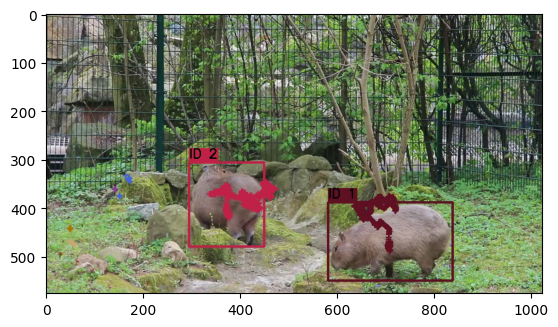

In [21]:
cap = cv2.VideoCapture('/content/gdrive/MyDrive/pr3/tracks.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 700)

ret, frame = cap.read()

frame_to_show = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_to_show)

# оценка скорости объекта

In [22]:
!gdown 1w4_qiQMIItQ9nS7avD6T3ldp74LXy_3Z

Downloading...
From: https://drive.google.com/uc?id=1w4_qiQMIItQ9nS7avD6T3ldp74LXy_3Z
To: /content/vehicles.mp4
100% 35.3M/35.3M [00:00<00:00, 142MB/s]


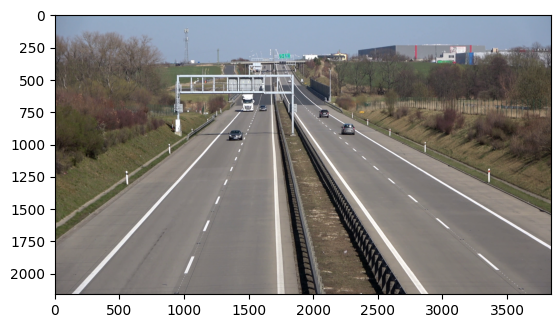

In [23]:
# Отобразим кадр из видео
import matplotlib.pyplot as plt
import cv2

cap = cv2.VideoCapture('vehicles.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 150)

ret, frame = cap.read()

frame_to_show = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_to_show)
cap.release()

In [25]:
# Зададим матрицы в программе
import numpy as np

image_matrix = np.array([
    [1252, 787],
    [2298, 803],
    [5039, 2159],
    [-550, 2159]
])

road_matrix = np.array([
    [0, 0],
    [24, 0],
    [24, 249],
    [0, 249],
])

image_matrix = image_matrix.astype(np.float32)
road_matrix = road_matrix.astype(np.float32)

perspective_matrix = cv2.getPerspectiveTransform(image_matrix, road_matrix)

In [26]:
# 1. Считываем исходное видео
import cv2

cap = cv2.VideoCapture('vehicles.mp4')
writer = cv2.VideoWriter('/content/gdrive/MyDrive/pr3/speed_estimation.mp4',
                         cv2.VideoWriter_fourcc(*'MP4V'),
                         25,
                         (int(cap.get(3)),int(cap.get(4)))
                        )

fps = cap.get(cv2.CAP_PROP_FPS)

assert cap.isOpened()

In [27]:
# готовим детектор и трекер
from ultralytics import YOLO
from boxmot.trackers.bytetrack.bytetrack import ByteTrack

detector = YOLO('yolov8m.pt')
tracker = ByteTrack()

In [28]:
classes = [2, 7] # индексы классов из видео, 2 - car, 7 - truck

In [29]:
import math

def process_frame(frame, detections, perspective_matrix, detect_points):
  process_frame = frame.copy()
  for data in detections:
    xmin = int(data[0])
    ymin = int(data[1])
    xmax = int(data[2])
    ymax = int(data[3])
    cx = xmin + int((xmax - xmin) / 2)
    cy = ymin + int((ymax - ymin) / 2)
    thickness = 5
    color = [255, 0, 0]

    center_coord = cv2.perspectiveTransform(np.array([cx, cy]).reshape(-1, 1, 2).astype(np.float32),perspective_matrix).reshape(-1, 2)[0]
    print(center_coord)
    if center_coord[1] < 0:
      continue

    cv2.rectangle(process_frame, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
    text = str(data[4])

    if not detect_points.get(data[4]):
      detect_points.update({data[4]: [center_coord[1]]})
    else:
      detect_points[data[4]].append(center_coord[1])
      time = len(detect_points[data[4]])
      l = detect_points[data[4]][-1] - detect_points[data[4]][0]
      text += f" {math.ceil(abs(l / (time / 25) * 3.6))}"

    (text_width, text_height) = \
    cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2)[0]
    text_offset_x = xmin
    text_offset_y = ymin - 5
    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = process_frame.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
    # add opacity (transparency to the box)
    process_frame = cv2.addWeighted(overlay, 0.6, process_frame, 0.4, 0)
    # now put the text (label: confidence %)
    cv2.putText(process_frame, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(0, 0, 0), thickness=2)

  return process_frame, detect_points

In [31]:
import numpy as np

def convert_yolo_numpy(detections):
    numpy_detections = []
    det_boxes = detections.boxes.data.tolist()

    for box in det_boxes:
        xmin, ymin, xmax, ymax, confidence, class_id = box
        xmin = int(xmin)
        ymin = int(ymin)
        xmax = int(xmax)
        ymax = int(ymax)
        class_id = int(class_id)
        numpy_detections.append([xmin, ymin, xmax, ymax, confidence, class_id])

    return np.array(numpy_detections)

In [32]:
detect_points = {}

while cap.isOpened():
  ret, frame = cap.read()

  if not ret:
    break

  detections = detector.predict(frame, verbose=False)

  numpy_detections = convert_yolo_numpy(detections[0])
  tracks = tracker.update(numpy_detections, frame)
  speed_frame, detect_points = process_frame(frame, tracks, perspective_matrix, detect_points)
  writer.write(speed_frame)

cap.release()
writer.release()

[     20.742      197.17]
[     2.7436      154.82]
[     7.8068      165.87]
[     7.8742       136.1]
[     20.743      195.66]
[     2.7705      156.24]
[     7.8526      167.49]
[     7.8201      137.33]
[      20.73      194.24]
[     2.7968      157.64]
[     7.8448      168.88]
[     7.7908      139.98]
[     20.728      192.51]
[     2.8131      158.79]
[     7.8223      170.83]
[     7.8494      147.43]
[     20.771      190.45]
[     2.8174      160.14]
[     7.8285      172.53]
[     7.8738      150.53]
[     20.753      189.04]
[     2.8015      161.26]
[     7.7989      174.56]
[     20.745      187.29]
[     2.8048      162.78]
[     7.8182      176.52]
[     20.765       185.5]
[     2.7893      163.86]
[     7.8225      177.91]
[     20.755      183.96]
[     2.7844      164.91]
[     7.8266      179.27]
[      20.76      182.22]
[     2.7795      165.95]
[     7.8137      180.77]
[      20.75       180.6]
[     2.7636      167.19]
[     7.8244      182.71]
[     20.749

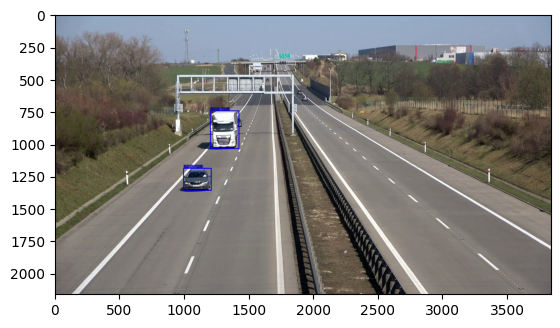

In [38]:
cap = cv2.VideoCapture('/content/gdrive/MyDrive/pr3/speed_estimation.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 350)

ret, frame = cap.read()

frame_to_show = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_to_show)

# Трекинг с реидонтефикацией

In [68]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [69]:
!gdown 1kwWi_nU8Dd3e4cLPoYq1ax5j00R2pMDh

Downloading...
From: https://drive.google.com/uc?id=1kwWi_nU8Dd3e4cLPoYq1ax5j00R2pMDh
To: /content/two_crossing_people.mp4
100% 2.21M/2.21M [00:00<00:00, 154MB/s]


In [73]:
!wget https://github.com/bharath5673/StrongSORT-YOLO/raw/refs/heads/main/weights/osnet_x0_25_msmt17.pt

--2024-11-30 11:08:53--  https://github.com/bharath5673/StrongSORT-YOLO/raw/refs/heads/main/weights/osnet_x0_25_msmt17.pt
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharath5673/StrongSORT-YOLO/refs/heads/main/weights/osnet_x0_25_msmt17.pt [following]
--2024-11-30 11:08:53--  https://raw.githubusercontent.com/bharath5673/StrongSORT-YOLO/refs/heads/main/weights/osnet_x0_25_msmt17.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9336983 (8.9M) [application/octet-stream]
Saving to: ‘osnet_x0_25_msmt17.pt’

osnet_x0_25_msmt17. 100%[===================>]   8.90M  --.-KB/s    in 0.05s   

2024-1

In [74]:
# Инициализируем объект модели - генератора эмбеддингов
from boxmot.appearance.reid_auto_backend import ReidAutoBackend
import torch
from pathlib import Path

weights_path = Path('./osnet_x0_25_msmt17.pt') # Подставьте здесь путь к весам найденной модели

In [75]:
# Создадим детектор и трекер
from ultralytics import YOLO

detector = YOLO('yolov8m.pt') # используйте публичные предобученные веса

In [76]:
from boxmot.trackers.strongsort.strongsort import StrongSort

tracker = StrongSort(weights_path, torch.device(0), False)

2024-11-30 11:10:58.081 | INFO     | boxmot.utils.torch_utils:select_device:52 - Yolo Tracking v11.0.5 🚀 Python-3.10.12 torch-2.2.2+cu121
CUDA:0 (Tesla T4, 15102MiB)
2024-11-30 11:10:58.153 | SUCCESS  | boxmot.appearance.reid_model_factory:load_pretrained_weights:183 - Loaded pretrained weights from osnet_x0_25_msmt17.pt


In [77]:
def process_frame(frame, detections):
  reid_frame = frame.copy()
  for data in detections:
    if data[6] != 0:
      continue
    xmin = int(data[0])
    ymin = int(data[1])
    xmax = int(data[2])
    ymax = int(data[3])
    cx = xmin + int((xmax - xmin) / 2)
    cy = ymin + int((ymax - ymin) / 2)
    thickness = 2
    color = [255, 0, 0]
    cv2.rectangle(reid_frame, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
    text = str(data[4])
    # calculate text width & height to draw the transparent boxes as background of the text
    (text_width, text_height) = \
    cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2)[0]
    text_offset_x = xmin
    text_offset_y = ymin - 5
    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = reid_frame.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
    # add opacity (transparency to the box)
    reid_frame = cv2.addWeighted(overlay, 0.6, reid_frame, 0.4, 0)
    # now put the text (label: confidence %)
    cv2.putText(reid_frame, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(0, 0, 0), thickness=2)
  return reid_frame

In [78]:
# Подготовим объекты для чтения исходного видео и для записи результата

import cv2

cap = cv2.VideoCapture('two_crossing_people.mp4')
writer = cv2.VideoWriter('/content/gdrive/MyDrive/pr3/reID_results.mp4',
                         cv2.VideoWriter_fourcc(*'MPEG'),
                         25,
                         (int(cap.get(3)),int(cap.get(4)))
                        )

fps = cap.get(cv2.CAP_PROP_FPS)

assert cap.isOpened()

In [79]:
# Применим трекер с реидентификацией

while cap.isOpened():
  ret, frame = cap.read()

  if not ret:
    break

  results = detector.predict(frame, verbose=False)
  numpy_detections = convert_yolo_numpy(results[0])
  tracks = tracker.update(numpy_detections, frame)

  reid_frame = process_frame(frame, tracks)
  writer.write(reid_frame)


cap.release()
writer.release()

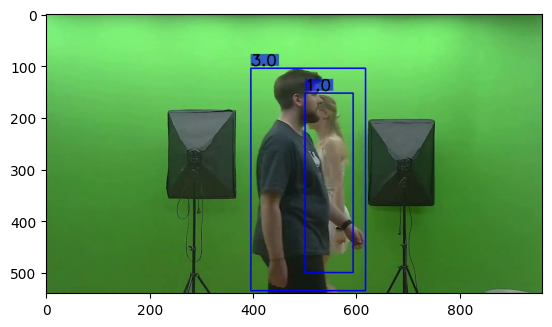

In [85]:
cap = cv2.VideoCapture('/content/gdrive/MyDrive/pr3/reID_results.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 200)

ret, frame = cap.read()

frame_to_show = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_to_show)

## попадание в интересующую область

In [20]:
!gdown 1XqhYWzTLT-JNQ83qYqBrc5YyR4EOV3jv

Downloading...
From: https://drive.google.com/uc?id=1XqhYWzTLT-JNQ83qYqBrc5YyR4EOV3jv
To: /content/area_count.mp4
100% 2.82M/2.82M [00:00<00:00, 130MB/s]


In [21]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [22]:
import cv2

cap = cv2.VideoCapture('/content/area_count.mp4')
writer = cv2.VideoWriter('/content/gdrive/MyDrive/pr3/detections_in_area.mp4',
                         cv2.VideoWriter_fourcc(*'MP4V'),
                         25,
                         (int(cap.get(3)),int(cap.get(4)))
                        )

assert cap.isOpened()

area_top_left = (700, 0)
area_bottom_right = (850, 370)

In [23]:
from ultralytics import YOLO
from boxmot.trackers.bytetrack.bytetrack import ByteTrack

detector = YOLO('yolov8m.pt')
tracker = ByteTrack()

In [24]:
def get_detections_in_area(tracked_detections, area_top_left, area_bottom_right):
  area_xmin, area_ymin = area_top_left
  area_xmax, area_ymax = area_bottom_right

  detections_in_area = []

  for data in tracked_detections:
    xmin = int(data[0])
    ymin = int(data[1])
    xmax = int(data[2])
    ymax = int(data[3])
    obj_id = int(data[4])
    cx = xmin + int((xmax - xmin) / 2)
    cy = ymin + int((ymax - ymin) / 2)
    if (area_xmin <= cx <= area_xmax) and (area_ymin <= cy <= area_ymax):
      detections_in_area.append(obj_id)

  return detections_in_area



In [25]:
def process_frame(frame, detections, counter, alr_tracked):
  roi_frame = frame.copy()
  area_xmin, area_ymin = area_top_left
  area_xmax, area_ymax = area_bottom_right
  tracked_id = get_detections_in_area(detections, area_top_left, area_bottom_right)
  cv2.rectangle(roi_frame, (area_xmin, area_ymin), (area_xmax, area_ymax), color=(255,128,255), thickness=3)
  for data in detections:
    xmin = int(data[0])
    ymin = int(data[1])
    xmax = int(data[2])
    ymax = int(data[3])
    cx = xmin + int((xmax - xmin) / 2)
    cy = ymin + int((ymax - ymin) / 2)
    if (data[4] not in alr_tracked) and (data[4] in tracked_id):
      counter += 1
      alr_tracked.append(data[4])
    thickness = 2
    color = [255, 0, 0]
    cv2.rectangle(roi_frame, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
    text = str(data[4])
    # calculate text width & height to draw the transparent boxes as background of the text
    (text_width, text_height) = \
    cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2)[0]
    text_offset_x = xmin
    text_offset_y = ymin - 5
    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = roi_frame.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
    # add opacity (transparency to the box)
    roi_frame = cv2.addWeighted(overlay, 0.6, roi_frame, 0.4, 0)
    # now put the text (label: confidence %)
    cv2.putText(roi_frame, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(0, 0, 0), thickness=2)
    cv2.putText(roi_frame, str(counter), (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(255, 0, 0), thickness=2)
  return roi_frame, counter, alr_tracked

In [26]:
counter = 0
alr_tracked = []

In [27]:
while cap.isOpened():
  ret, frame = cap.read()

  if not ret:
    break

  detections = detector.predict(frame, verbose=False)
  numpy_detections = convert_yolo_numpy(detections[0])
  tracks = tracker.update(numpy_detections, frame)

  print(tracks)
  roi_frame, counter, alr_tracked = process_frame(frame, tracks, counter, alr_tracked)
  writer.write(roi_frame)

cap.release()
writer.release()


[[        387         151         494         356          58     0.89233           0           0]
 [          1          94         262         363          59     0.85457           7           1]
 [        468         144         549         331          60     0.83967           0           2]
 [        250         218         318         298          61     0.62748           1           3]
 [        564         143         581         189          62      0.4634           0           4]
 [        547         144         564         189          63     0.46307           0           5]]
[[        387         151         494         356          58     0.89231           0           0]
 [          1          94         262         363          59     0.85372           7           1]
 [        468         144         549         331          60     0.83971           0           2]
 [        250         218         318         298          61     0.62661           1           3]
 [       